In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [2]:
# 人脸的数据量 比较大 所以要通过网络下载
from sklearn.datasets import fetch_lfw_people

In [3]:
# data_home=None, 下载下来的图片 保存在哪里 （建议大家不要改变这个参数）
# resize=0.5, 对原图片的缩放比例
# min_faces_per_person=0 每个人最少提供多少张图片
faces = fetch_lfw_people(resize=0.8,min_faces_per_person=70)

In [4]:
data = faces.data  # 特征值
target = faces.target  # 目标值
names = faces.target_names
faces.images

array([[[254.      , 254.      , 254.33333 , ...,  46.666668,
          40.      ,  38.666668],
        [254.      , 253.66667 , 254.      , ...,  48.      ,
          40.333332,  39.      ],
        [254.33333 , 254.      , 254.      , ...,  49.      ,
          42.333332,  39.666668],
        ...,
        [ 69.333336,  60.      ,  51.      , ...,  91.333336,
          87.666664,  83.666664],
        [ 65.      ,  57.333332,  48.333332, ...,  89.666664,
          87.      ,  86.      ],
        [ 59.333332,  56.333332,  49.666668, ...,  87.666664,
          86.666664,  86.666664]],

       [[ 40.      ,  33.666668,  39.      , ...,  46.      ,
          37.666668,  32.      ],
        [ 40.666668,  40.      ,  48.      , ...,  47.666668,
          42.      ,  37.333332],
        [ 42.333332,  47.333332,  58.      , ...,  54.333332,
          48.      ,  40.333332],
        ...,
        [ 75.666664,  75.666664,  75.666664, ..., 114.      ,
         112.666664, 122.      ],
        [ 77

In [5]:
faces.images[0].shape  # 通过观察images的形状 得知 图片是黑白图片 100*75

(100, 75)

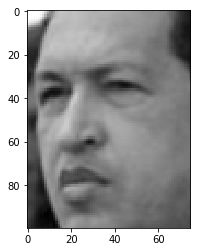

In [6]:
plt.imshow(faces.images[0],cmap='gray')

In [9]:
target.shape  # 1288张图片

(1288,)

In [11]:
Series(target).unique()

array([5, 6, 3, 1, 0, 4, 2], dtype=int64)

In [13]:
names  # 7个人的名字

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [ ]:
# 把沙龙的图片找出来

In [7]:
# 按照值 寻找索引
name = 'George W Bush'
index = np.argwhere(names == name)[0,0]  # 找到指定的名字的 编号
index

3

In [32]:
# 按照名字的编号 去target里面 寻找 哪些是我要的样本
# 然后按照这个顺序去 data里面 把数据取出来

name = 'George W Bush'
index = np.argwhere(names == name)[0,0]
data[target == index]  # 是true的就取出来了 也就是说 是我要的那个人 就取出来了
data[target == index][0]

array([ 90.      ,  77.333336,  85.666664, ..., 182.66667 , 183.33333 ,
       182.66667 ], dtype=float32)

In [23]:
data[target == index][0].shape

(7500,)

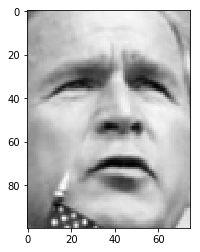

In [33]:
plt.imshow(data[target == index][0].reshape(100,75),cmap='gray')

In [ ]:
# 封装函数 （传入名字 就把这个人的25个图片显示出来）

In [8]:
def find_person(name):
    index = np.argwhere(names == name)[0,0]
    data[target == index]  # 是true的就取出来了 也就是说 是我要的那个人 就取出来了
    faces = data[target == index]  # 按照索引找到的 指定的 人 的 很多个图片
    # 把其中的25个画出来
    plt.figure(figsize=(15,15))
    for i in range(1,26):
        axes = plt.subplot(5,5,i)
        plt.imshow(faces[i-1].reshape(100,75),cmap='gray')
        axes.axis('off')

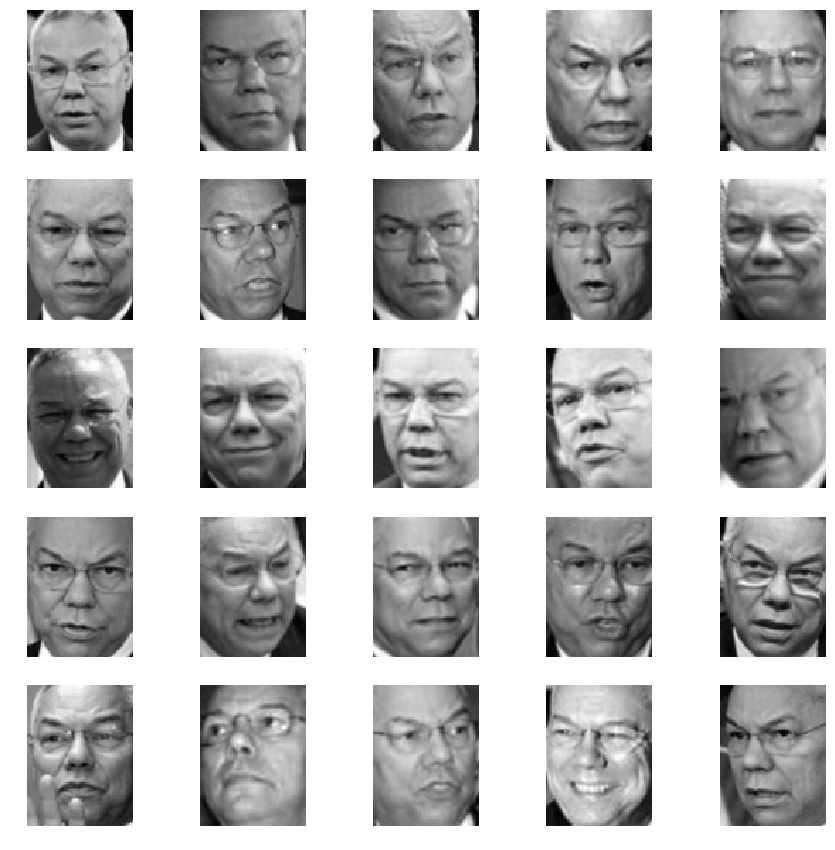

In [9]:
find_person('Colin Powell')

In [ ]:
# 对数据进行降维

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=0.95)

In [12]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
data.shape

(1288, 7500)

In [14]:
pca_data = pca.transform(data)

In [15]:
pca_data.shape

(1288, 193)

In [ ]:
# 训练模型 挑选模型 参数调优

In [16]:
# 所有可以用来分类的 都试一下
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
# 交叉验证各种模型的分数
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
# 模型挑选 (注意！！！！！处理图片用的是降维后的数据)

In [18]:
kf = KFold(n_splits=4,shuffle=True)

In [19]:
cross_val_score(KNeighborsClassifier(),data,target,cv=kf)

array([0.57453416, 0.61801242, 0.5931677 , 0.54968944])

In [20]:
cross_val_score(LogisticRegression(),data,target,cv=kf).mean()

0.8330745341614906

In [21]:
cross_val_score(DecisionTreeClassifier(),data,target,cv=kf).mean()

0.46506211180124224

In [22]:
cross_val_score(GaussianNB(),data,target,cv=kf).mean()

0.48913043478260876

In [23]:
cross_val_score(SVC(),data,target,cv=kf).mean()

0.41149068322981364

In [ ]:
# (注意！！！！！处理图片用的是降维后的数据)

In [29]:
cross_val_score(KNeighborsClassifier(),pca_data,target,cv=kf).mean()

0.6032608695652173

In [25]:
cross_val_score(LogisticRegression(),pca_data,target,cv=kf).mean()

0.7290372670807453

In [26]:
cross_val_score(DecisionTreeClassifier(),pca_data,target,cv=kf).mean()

0.38354037267080743

In [27]:
cross_val_score(GaussianNB(),pca_data,target,cv=kf).mean()

0.6490683229813665

In [28]:
cross_val_score(SVC(),pca_data,target,cv=kf).mean()

0.41149068322981364

In [ ]:
# 大家可以挑选比较好的三个 去进行 参数调优
# 我这里 上课时间优先 只用最好的那一个做示例

In [ ]:
# 参数调优

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {
    'tol':[0.00001,0.0001,0.001,0.01,0.1,1],
    'C':[0.01,0.1,1,10,100],
    'fit_intercept':[True,False]
}

In [ ]:
# tol=0.0001, C=1.0,
LogisticRegression()

In [32]:
grid = GridSearchCV(LogisticRegression(),param_grid=params)  # 创建网格化验证参数的对象

In [ ]:
# 一定一定要注意 这里用的是降维后的数据

In [33]:
grid.fit(pca_data,target)  # 降维后的特征值 和 目标值

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'C': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
lgc = grid.best_estimator_

In [35]:
lgc.score(pca_data,target)

0.8928571428571429

In [36]:
# 从网上找 那7个人 的照片 变成黑白的 把头部截取 按照比例缩放 然后就可以预测

In [38]:
img = plt.imread('./data/99.jpeg')

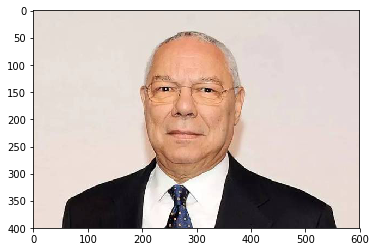

In [39]:
plt.imshow(img)

In [ ]:
# 变成黑白的

In [43]:
img2 = img.mean(axis=-1)  # 灰度化处理 让最里面的那一个维度 求平均值

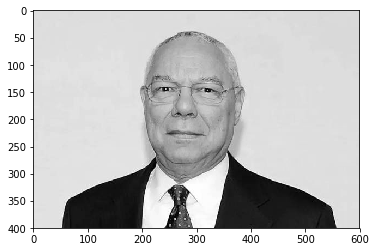

In [45]:
plt.imshow(img2,cmap='gray')

In [51]:
190+225

415

In [ ]:
# 切割面部 这样识别得才准确

In [ ]:
# 切割面部的时候要注意 一会儿还要缩放 所以最好按照比例 100,75 去切割
400 300

In [57]:
img3 = img2[0:400,150:450]

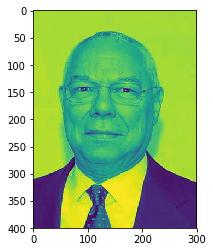

In [58]:
plt.imshow(img3)

In [ ]:
# 模型输入的要求形状是 100,75

In [59]:
img3.shape

(400, 300)

In [ ]:
# 缩放

In [50]:
from scipy import ndimage

In [61]:
img4 = ndimage.zoom(img3,[0.25,0.25])

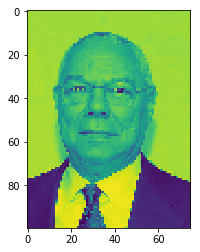

In [62]:
plt.imshow(img4)

In [64]:
img4.shape

(100, 75)

In [ ]:
# 注意 训练模型的时候 用的是 pca处理后的 数据 所以这里测试的时候 数据也要pca处理一下

In [ ]:
# 还要注意图片的形状 需要变成

In [66]:
pca_img = pca.transform(img4.reshape(1,-1))

In [70]:
index = lgc.predict(pca_img)[0]
index

1

In [71]:
names[index]

'Colin Powell'

In [ ]:
# 模型训练好了

In [ ]:
# 从网上找图片 灰度化处理 取头部 缩放 变形 

In [91]:
img = plt.imread('./data/98.jpg')

In [92]:
img2 = img.mean(axis=-1)

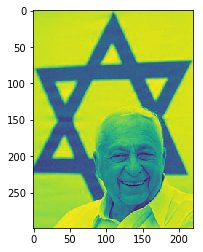

In [93]:
plt.imshow(img2)

In [78]:
img2.shape

(299, 220)

In [ ]:
# 100 75

In [102]:
img3 = img2[160:260,95:170]

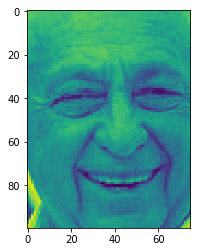

In [103]:
plt.imshow(img3)

In [104]:
img3.shape

(100, 75)

In [105]:
img4 = img3

In [83]:
img4 = ndimage.zoom(img3,[0.5,0.5])

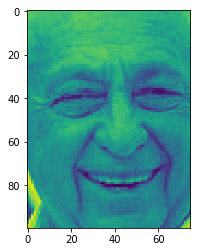

In [106]:
plt.imshow(img4)

In [107]:
pca_img = pca.transform(img4.reshape(1,-1))

In [108]:
lgc.predict(pca_img)

array([0], dtype=int64)